<big>**Практикум 2.8. Условный экстремум функции нескольких переменных**</big>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math

**Упражнение 1. Построить на поверхности кривую <big>$z=f(x,y)$</big>, определяемую ограничением <big>$\varphi(x,y)=0$</big>. По возможности, определить визуально наличие и примерное расположение точек безусловного минимума и максимума функции <big>$z=f(x,y)$</big>, а также точек условного минимума и максимума этой функции при ограничении <big>$\varphi(x,y)=0$</big>.**

**а) <big>$z = \frac{1}{3}x^3 + \frac{1}{3}y^3$</big>, если <big>$1=x+4y$</big>.**

*Пусть <big>$x = 4t$</big>, тогда <big>$y = \frac{1-4t}{4} = \frac{1}{4} - t$</big>;*

*Тогда линия пересечения: <big>$z = \frac{(4t)^3}{3} + \frac{(\frac{1}{4}-t)^3}{3}$</big>.*

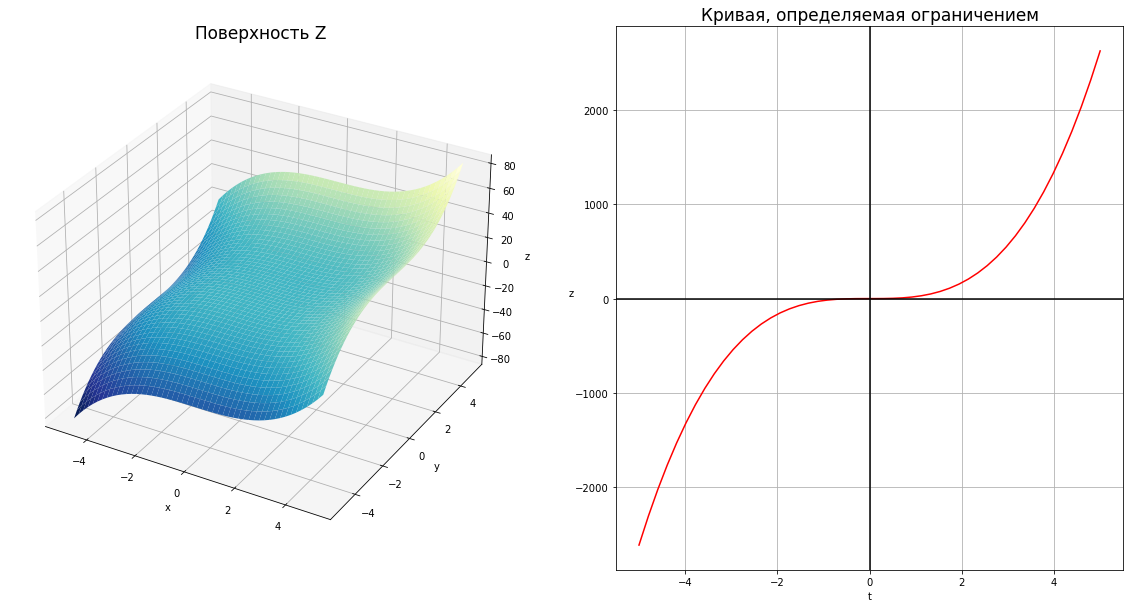

In [15]:
fig = plt.figure(figsize=(20, 10))

xs = np.linspace(-5, 5, 50)
ys = np.linspace(-5, 5, 50)
t = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(xs, ys)

ax = fig.add_subplot(121, projection="3d")
Z = 1 / 3 * X**3 + 1 / 3 * Y**3
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, linewidth=0)
# параметры координатной плоскости
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Поверхность Z", fontsize=17)
ax.grid()


ax2 = fig.add_subplot(122)
ax2.plot(t, 1 / 3 * (4 * t) ** 3 + 1 / 3 * (1 / 4 - t) ** 3, "r")
# параметры координатной плоскости
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.set_xlabel("t")
ax2.set_ylabel("z", rotation=0)
ax2.set_title("Кривая, определяемая ограничением", fontsize=17)
ax2.grid()

**б) <big>$z = (x+1)^2+y^2$</big>, если <big>$y^2-x^3=0$</big>.**

*Пусть <big>$x = t$</big>, тогда <big>$y^2 = t^3$</big>;*

*Тогда линия пересечения: <big>$z = \pm((t+1)^2 + t^3)$</big>.*

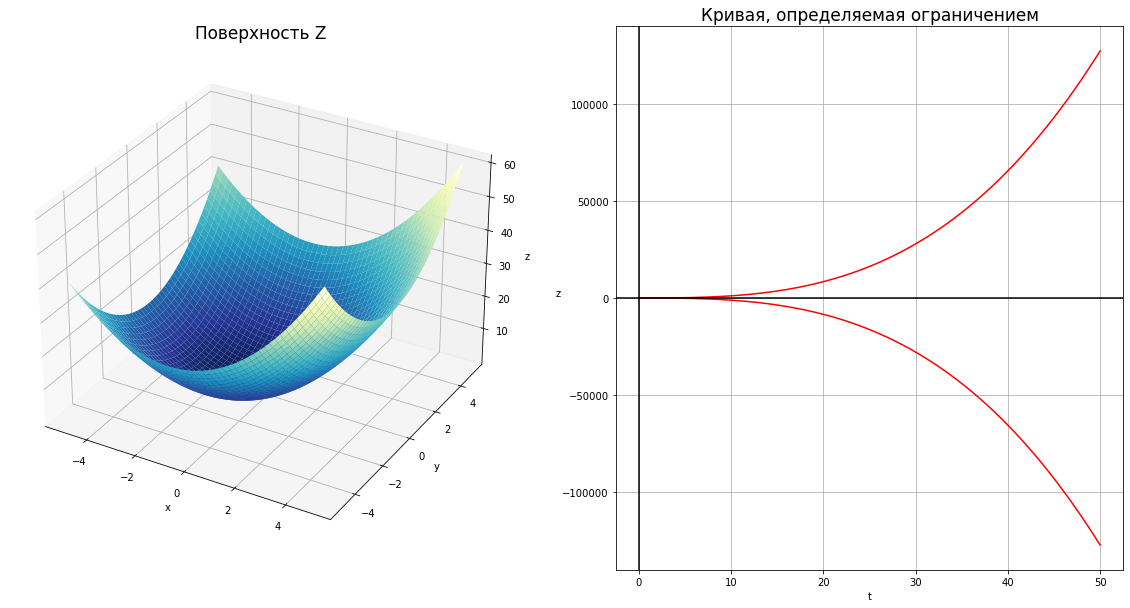

In [16]:
fig = plt.figure(figsize=(20, 10))

xs = np.linspace(-5, 5, 50)
ys = np.linspace(-5, 5, 50)
t = np.linspace(0, 50, 500)
X, Y = np.meshgrid(xs, ys)

ax = fig.add_subplot(121, projection="3d")
Z = (X + 1) ** 2 + Y**2
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, linewidth=0)
# параметры координатной плоскости
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Поверхность Z", fontsize=17)
ax.grid()

ax2 = fig.add_subplot(122)
ax2.plot(t, (t + 1) ** 2 + t**3, "r")
ax2.plot(t, -((t + 1) ** 2 + t**3), "r")
# параметры координатной плоскости
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.set_xlabel("t")
ax2.set_ylabel("z", rotation=0)
ax2.set_title("Кривая, определяемая ограничением", fontsize=17)
ax2.grid()

**Упражнение 2. Используя прямой метод, найдите точки условного экстремума функции <big>$z = \frac{1}{3}x^3 + \frac{1}{3}y^3$</big>, если <big>$1=x+4y$</big>.**

*Выразим <big>$x = 1-4y$</big>, тогда <big>$z = \frac{(1-4y)^3}{3} + \frac{y^3}{3}$</big>;*

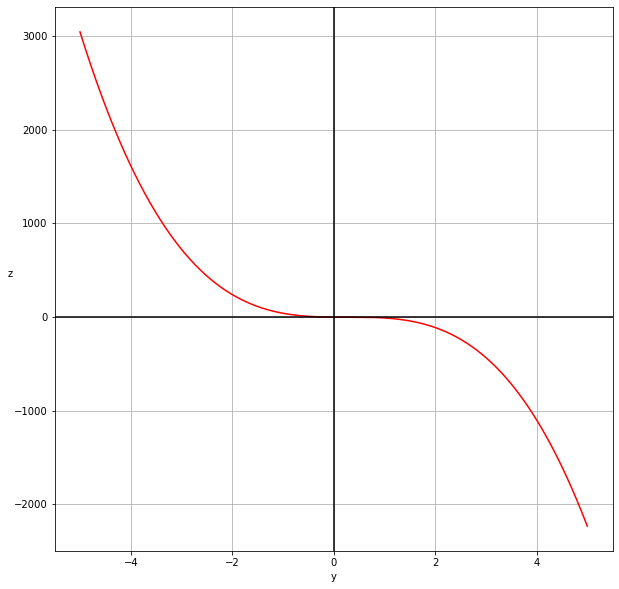

Первая производная: y**2 - 4*(1 - 4*y)**2
Первая производная равна нулю в точках:
[1/9, 2/9] -> z = 1/243
[-1/7, 2/7] -> z = 1/147

Вторая производная: 32 - 126*y
Вторая производная равна в точках:
[1/9, 2/9] -> z'' = 4
[-1/7, 2/7] -> z'' = -4


In [20]:
fig = plt.figure(figsize=(10, 10))

def funcInPoint(f, point):
    return f.subs(y, point)

y = sp.symbols("y")
f = ((1 - 4 * y) ** 3) / 3 + (y**3) / 3

yf = np.arange(-5, 5, 0.01)
zf = []
for i in range(len(yf)):
    zf.append(funcInPoint(f, yf[i]))
plt.plot(yf, zf, "r")

# параметры координатной плоскости
plt.xlabel("y")
plt.ylabel("z", rotation=0)
plt.grid()
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.show()

print("Первая производная:", sp.diff(f, y))

print("Первая производная равна нулю в точках:")
eq = sp.solve(sp.diff(f, y))
for i in range(len(eq)):
    print("[", 1 - 4 * eq[i], ", ", eq[i], "]", " -> z = ", funcInPoint(f, eq[i]), sep="")

print("\nВторая производная:", sp.diff(sp.diff(f, y), y))
print("Вторая производная равна в точках:")
dir2 = sp.diff(sp.diff(f, y), y)
for i in range(len(eq)):
    print("[", 1 - 4 * eq[i], ", ", eq[i], "]", " -> z'' = ", funcInPoint(dir2, eq[i]), sep="")

**Упражнение 3. Выясните, для каких из перечисленных ниже задач можно использовать метод множителей Лагранжа:**

**а) Найти условный экстремум <big>$z = \frac{1}{3}x^3 + \frac{1}{3}y^3$</big>, если <big>$1=x+4y$</big>.**

In [5]:
x, y, lam = sp.symbols("x y λ")

z = 1 / 3 * x**3 + 1 / 3 * y**3
phi = x + 4 * y - 1
L = z + lam * phi
print(sp.solve([sp.diff(L, x), sp.diff(L, y), sp.diff(L, lam)]))

[{x: -0.142857142857143, y: 0.285714285714286, λ: -0.0204081632653061}, {x: 0.111111111111111, y: 0.222222222222222, λ: -0.0123456790123457}]


*Корни действительные, метод Лагранжа применим.*

**б) Найти условный экстремум <big>$z = (x+1)^2+y^2$</big>, если <big>$y^2-x^3=0$</big>.**

In [6]:
x, y, lam = sp.symbols("x y λ")

z = (x + 1) ** 2 + y**2
phi = y**2 - x**3
L = z + lam * phi
print(sp.solve([sp.diff(L, x), sp.diff(L, y), sp.diff(L, lam)]))

[{x: -1/3 - sqrt(5)*I/3, y: -2**(3/4)*3**(1/4)*cos(atan(sqrt(5)/7)/2)/3 - 2**(3/4)*3**(1/4)*I*sin(atan(sqrt(5)/7)/2)/3, λ: -1}, {x: -1/3 - sqrt(5)*I/3, y: 2**(3/4)*3**(1/4)*cos(atan(sqrt(5)/7)/2)/3 + 2**(3/4)*3**(1/4)*I*sin(atan(sqrt(5)/7)/2)/3, λ: -1}, {x: -1/3 + sqrt(5)*I/3, y: -2**(3/4)*3**(1/4)*cos(atan(sqrt(5)/7)/2)/3 + 2**(3/4)*3**(1/4)*I*sin(atan(sqrt(5)/7)/2)/3, λ: -1}, {x: -1/3 + sqrt(5)*I/3, y: 2**(3/4)*3**(1/4)*cos(atan(sqrt(5)/7)/2)/3 - 2**(3/4)*3**(1/4)*I*sin(atan(sqrt(5)/7)/2)/3, λ: -1}]


*Корни комплексные, метод Лагранжа не применим.*

**Упражнение 4. Используя метод множителей Лагранжа, найдите точки условного экстремума.**

**<big>$z = \frac{1}{3}x^3 + \frac{1}{3}y^3$</big>, если <big>$1=x+4y$</big>.**

In [7]:
def funcInPoint2(f, point):
    return f.subs(x, point[0]).subs(y, point[1])

def getType2(d_det, point):
    if d_det < 0:
        print("△ = ", d_det, " -> ", "условный максимум в точке [", point[0], ", ", point[1], "]", sep="")
    if d_det > 0:
        print("△ = ", d_det, " -> ", "условный минимум в точке [", point[0], ", ", point[1], "]", sep="")

x, y, lam = sp.symbols("x y λ")

z = 1 / 3 * x**3 + 1 / 3 * y**3
phi = x + 4 * y - 1
L = z + lam * phi

d = sp.Matrix([[0, sp.diff(phi, x), sp.diff(phi, y)], [sp.diff(phi, x), sp.diff(L, x, 2), sp.diff(sp.diff(L, x), y)], [sp.diff(phi, y), sp.diff(sp.diff(L, x), y), sp.diff(L, y, 2)]])
d_det = -sp.det(d)
points = sp.solve([sp.diff(L, x), sp.diff(L, y), sp.diff(L, lam)])

for i in range(len(points)):
    getType2(funcInPoint2(d_det, [points[i][x], points[i][y]]), [points[i][x], points[i][y]])

△ = -4.00000000000000 -> условный максимум в точке [-0.142857142857143, 0.285714285714286]
△ = 4.00000000000000 -> условный минимум в точке [0.111111111111111, 0.222222222222222]


**Упражнение 5. Построить на поверхности кривую <big>$z=f(x,y)$</big>, определяемую ограничением <big>$\varphi(x,y)=0$</big>. По возможности, определить визуально наличие и примерное расположение точек безусловного минимума и максимума функции <big>$z=f(x,y)$</big>, а также точек условного минимума и максимума этой функции при ограничении <big>$\varphi(x,y)=0$</big>. Выясните, для каких из перечисленных ниже задач можно использовать метод множителей Лагранжа. Используя метод множителей Лагранжа, найдите точки условного экстремума.**

**<big>$z = x^2+2y^2+3y$</big>, если <big>$x^2+y^2-2xy$</big>.**

**<big>$x^2+y^2-2xy=0 \Leftrightarrow (x-y)^2=0 \Leftrightarrow x = y$</big>**;

*Пусть <big>$y = t$</big>, тогда <big>$x = t$</big>;*

*Тогда линия пересечения: <big>$z = t^2+2t^2+3t = 3t^2+3t = 3t (t+1)$</big>.*

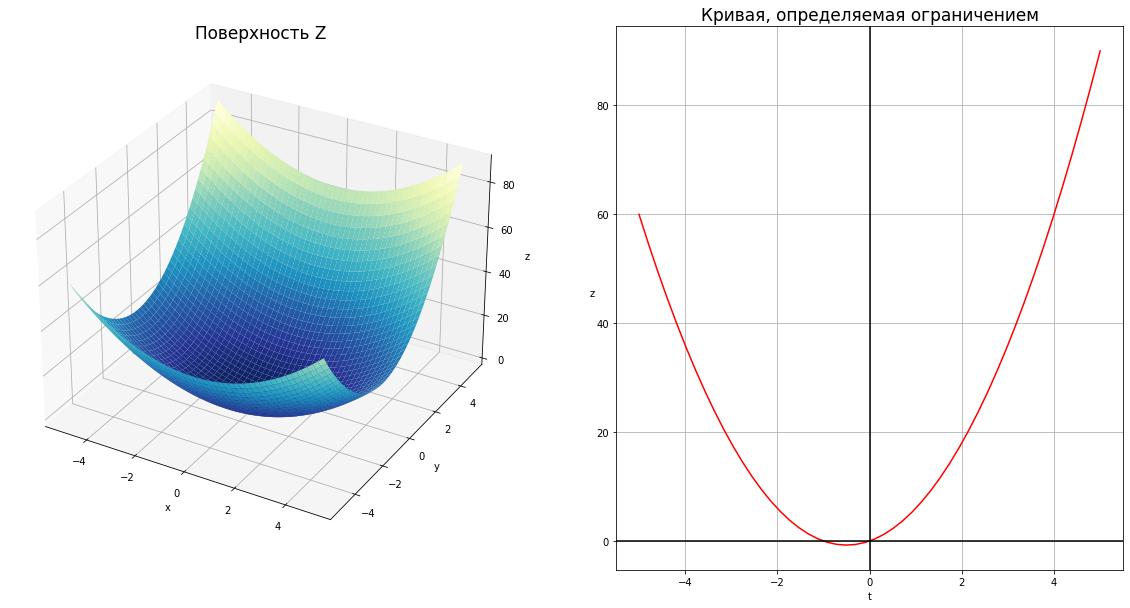

In [21]:
fig = plt.figure(figsize=(20, 10))

xs = np.linspace(-5, 5, 50)
ys = np.linspace(-5, 5, 50)
t = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(xs, ys)

ax = fig.add_subplot(121, projection="3d")
Z = X**2 + 2*Y**2 +3*Y
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, linewidth=0)
# параметры координатной плоскости
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Поверхность Z", fontsize=17)
ax.grid()

ax2 = fig.add_subplot(122)
ax2.plot(t, 3*t*(t+1), "r")
# параметры координатной плоскости
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.set_xlabel("t")
ax2.set_ylabel("z", rotation=0)
ax2.set_title("Кривая, определяемая ограничением", fontsize=17)
ax2.grid()

In [13]:
x, y, lam = sp.symbols("x y λ")

z = x**2 + 2*y**2 +3*y
phi = x-y
L = z + lam * phi
print(sp.solve([sp.diff(L, x), sp.diff(L, y), sp.diff(L, lam)]))

{x: -1/2, y: -1/2, λ: 1}


*Корни действительные, метод Лагранжа применим.*

In [14]:
def funcInPoint2(f, point):
    return f.subs(x, point[0]).subs(y, point[1])

def getType2(d_det, point):
    if d_det < 0:
        print("△ = ", d_det, " -> ", "условный максимум в точке [", point[0], ", ", point[1], "]", sep="")
    if d_det > 0:
        print("△ = ", d_det, " -> ", "условный минимум в точке [", point[0], ", ", point[1], "]", sep="")

x, y, lam = sp.symbols("x y λ")

z = x**2 + 2*y**2 +3*y
phi = x-y
L = z + lam * phi

d = sp.Matrix([[0, sp.diff(phi, x), sp.diff(phi, y)], [sp.diff(phi, x), sp.diff(L, x, 2), sp.diff(sp.diff(L, x), y)], [sp.diff(phi, y), sp.diff(sp.diff(L, x), y), sp.diff(L, y, 2)]])
d_det = -sp.det(d)
points = sp.solve([sp.diff(L, x), sp.diff(L, y), sp.diff(L, lam)])
print(points, "\n")

getType2(funcInPoint2(d_det, [points[x], points[y]]), [points[x], points[y]])

{x: -1/2, y: -1/2, λ: 1} 

△ = 6 -> условный минимум в точке [-1/2, -1/2]


**Упражнение 1C. Построить на поверхности кривую <big>$z=f(x,y)$</big>, определяемую ограничением <big>$\varphi(x,y)=0$</big>. По возможности, определить визуально наличие и примерное расположение точек безусловного минимума и максимума функции <big>$z=f(x,y)$</big>, а также точек условного минимума и максимума этой функции при ограничении <big>$\varphi(x,y)=0$</big>.**

**<big>$z = x^2+12xy+2y^2$</big>, если <big>$4x^2+y^2=25$</big>.**

*Пусть <big>$\begin{equation}
    \begin{cases}
      x = 2.5 cos(t)\\
      y = 5 sin(t)
    \end{cases}\,
\end{equation}$</big>;*

*Тогда линия пересечения: <big>$z = (2.5cos (t))^2 + (12 · 2.5cos (t) · 5sin (t)) + (2 · (5sin (t))^2) = 6.25cos^2(t) + 75sin(2t) + 50sin^2(t)$</big>.*

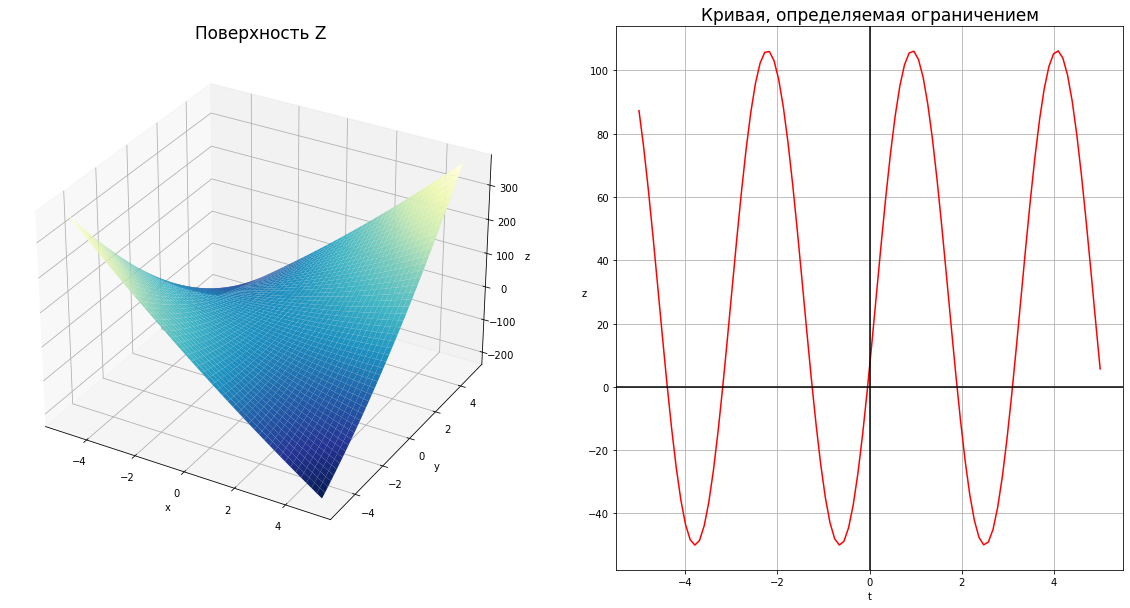

In [22]:
fig = plt.figure(figsize=(20, 10))

xs = np.linspace(-5, 5, 50)
ys = np.linspace(-5, 5, 50)
t = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(xs, ys)

ax = fig.add_subplot(121, projection="3d")
Z = X**2 + 12 * X * Y + 2 * Y**2
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, linewidth=0)
# параметры координатной плоскости
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Поверхность Z", fontsize=17)
ax.grid()

ax2 = fig.add_subplot(122)
ax2.plot(t, (2.5 * np.cos(t)) ** 2 + 75 * np.sin(2 * t) + 50 * np.sin(t) ** 2, "r")
# параметры координатной плоскости
ax2.axhline(y=0, color="k")
ax2.axvline(x=0, color="k")
ax2.set_xlabel("t")
ax2.set_ylabel("z", rotation=0)
ax2.set_title("Кривая, определяемая ограничением", fontsize=17)
ax2.grid()

**Упражнение 2C. Используя метод множителей Лагранжа, найдите точки условного экстремума.**

**<big>$z = x^2+12xy+2y^2$</big>, если <big>$4x^2+y^2=25$</big>.**

In [12]:
def funcInPoint2(f, point):
    return f.subs(x, point[0]).subs(y, point[1]).subs(lam, point[2])

def getType2(d_det, point):
    if d_det < 0:
        print("△ = ", d_det, " -> ", "условный максимум в точке [", point[0], ", ", point[1], "]", sep="")
    if d_det > 0:
        print("△ = ", d_det, " -> ", "условный минимум в точке [", point[0], ", ", point[1], "]", sep="")

x, y, lam = sp.symbols("x y λ")

z = x**2 + 12 * x * y + 2 * y **2
phi = 4* x**2 + y**2-25
L = z + lam * phi

d = sp.Matrix([[0, sp.diff(phi, x), sp.diff(phi, y)], [sp.diff(phi, x), sp.diff(L, x, 2), sp.diff(sp.diff(L, x), y)], [sp.diff(phi, y), sp.diff(sp.diff(L, x), y), sp.diff(L, y, 2)]])
d_det = -sp.det(d)
points = sp.solve([sp.diff(L, x), sp.diff(L, y), sp.diff(L, lam)])
print(points, "\n")

for i in range(len(points)):
    getType2(funcInPoint2(d_det, [points[i][x], points[i][y], points[i][lam]]), [points[i][x], points[i][y], points[i][lam]])

[{x: -2, y: 3, λ: 2}, {x: -3/2, y: -4, λ: -17/4}, {x: 3/2, y: 4, λ: -17/4}, {x: 2, y: -3, λ: 2}] 

△ = 5000 -> условный минимум в точке [-2, 3]
△ = -5000 -> условный максимум в точке [-3/2, -4]
△ = -5000 -> условный максимум в точке [3/2, 4]
△ = 5000 -> условный минимум в точке [2, -3]
